In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/emissions_reduction_data.csv')
print(df)
df.head(5)
df.describe()
df.tail()
df.isnull().sum()
df = df.dropna()
df.duplicated().sum()
df.drop_duplicates(inplace=True)


      energy_efficiency  renewable_ratio  technology_cost  emission_reduction
0             68.727006         0.373641      7569.984799                   0
1             97.535715         0.332912      2660.607960                   0
2             86.599697         0.176154      4119.757249                   0
3             79.932924         0.607267      6969.525732                   1
4             57.800932         0.476624      5338.804101                   0
...                 ...              ...              ...                 ...
9995          92.882799         0.877039      9570.479053                   0
9996          94.875442         0.046814      7730.417901                   0
9997          97.335396         0.303698      1175.102765                   0
9998          69.874400         0.443320      4609.043582                   0
9999          60.857020         0.172265      3316.581812                   0

[10000 rows x 4 columns]


In [ ]:
x = df[['energy_efficiency', 'renewable_ratio', 'technology_cost']]
y = df['emission_reduction']
print(x)
print(y)

      energy_efficiency  renewable_ratio  technology_cost
0             68.727006         0.373641      7569.984799
1             97.535715         0.332912      2660.607960
2             86.599697         0.176154      4119.757249
3             79.932924         0.607267      6969.525732
4             57.800932         0.476624      5338.804101
...                 ...              ...              ...
9995          92.882799         0.877039      9570.479053
9996          94.875442         0.046814      7730.417901
9997          97.335396         0.303698      1175.102765
9998          69.874400         0.443320      4609.043582
9999          60.857020         0.172265      3316.581812

[10000 rows x 3 columns]
0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: emission_reduction, Length: 10000, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
k=5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.99


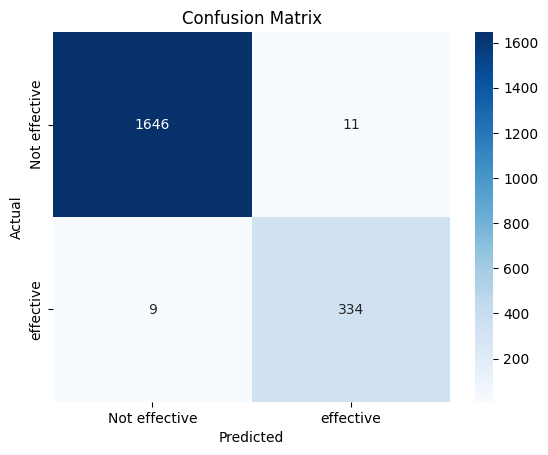

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues',
            xticklabels=['Not effective', 'effective'],
            yticklabels=['Not effective', 'effective'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not effective', 'effective']))

               precision    recall  f1-score   support

Not effective       0.99      0.99      0.99      1657
    effective       0.97      0.97      0.97       343

     accuracy                           0.99      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.99      0.99      0.99      2000



In [ ]:
accuracy_scores=[]
k_values=range(1,20)

for k in k_values:
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy_scores.append(accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'Accuracy vs number of neighbours')

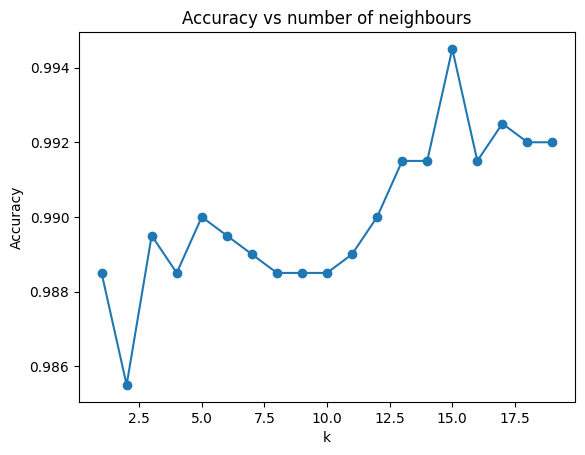

In [ ]:
plt.plot(k_values,accuracy_scores,marker='o',linestyle='-')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs number of neighbours')